In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO
import requests

In [ ]:
url = "https://www.jpchacha.com/blog/content/00000002/lena_256.jpg"
response = requests.get(url)
image = Image.open(BytesIO(response.content)).convert()
img_array = np.asarray(image)

plt.figure(figsize=(16, 9))
plt.imshow(img_array)
plt.axis('off')
plt.show()

# Média

In [ ]:
img_average = img_array.copy()
img_average = np.mean(img_average, axis=2) / 255

plt.figure(figsize=(11.2, 6.3))
plt.imshow(img_average, cmap="gray")
plt.axis('off')
plt.show()

# Correção de Luminosidade
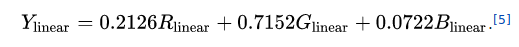

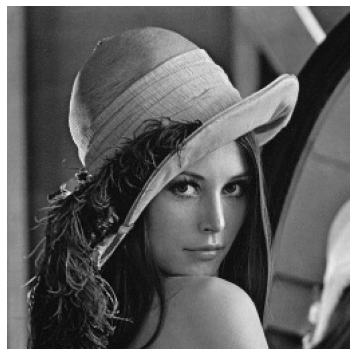

In [4]:
weights = [0.2126, 0.7152, 0.0722]
res = np.array(img_array * weights, dtype=np.uint8)
img_luminance_correction = np.array(np.sum(res, axis=2), dtype=np.uint8)

plt.figure(figsize=(11.2, 6.3))
plt.imshow(img_luminance_correction, cmap='gray')
plt.axis('off')
plt.show()

# Compressão Gamma
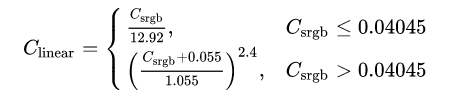

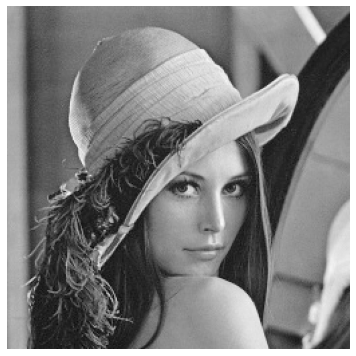

In [10]:
img_gamma_compression = img_luminance_correction.copy()
img_gamma_compression = 255 * ((img_gamma_compression / 255) ** (1 / 2.2))

plt.figure(figsize=(11.2, 6.3))
plt.imshow(img_gamma_compression, cmap='gray')
plt.axis('off')
plt.show()

# Aproximação Linear
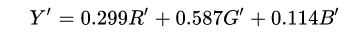

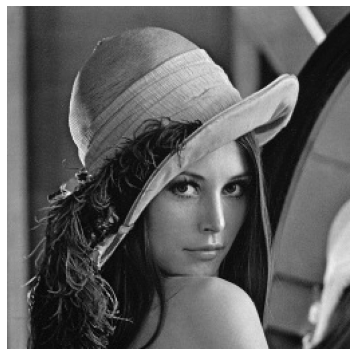

In [6]:
weights = [0.299, 0.587, 0.114]
res = np.array(img_array * weights, dtype=np.uint8)
img_linear_approximation = np.array(np.sum(res, axis=2), dtype=np.uint8)

plt.figure(figsize=(11.2, 6.3))
plt.imshow(img_linear_approximation, cmap="gray")
plt.axis('off')
plt.show()

# Comparação

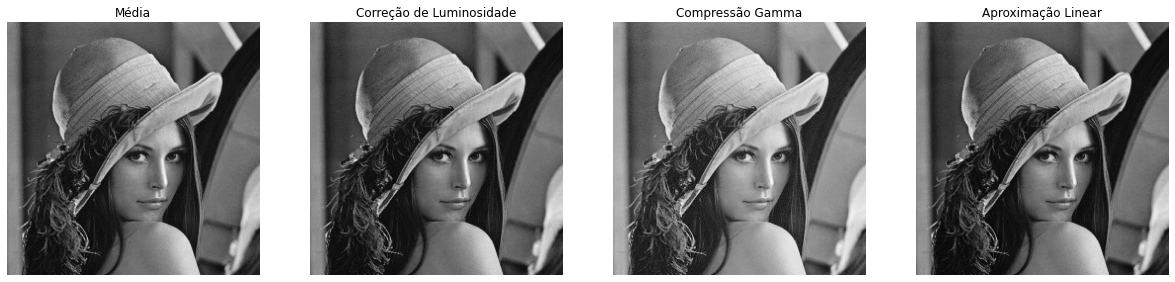

In [8]:
fig, (avg, lum, gamma, linear) = plt.subplots(1, 4, figsize=(20.8, 11.7))

avg.imshow(img_average, cmap='gray')
avg.set_title('Média')
avg.axis('off')

lum.imshow(img_luminance_correction, cmap='gray')
lum.set_title('Correção de Luminosidade')
lum.axis('off')

gamma.imshow(img_gamma_compression, cmap='gray')
gamma.set_title('Compressão Gamma')
gamma.axis('off')

linear.imshow(img_linear_approximation, cmap='gray')
linear.set_title('Aproximação Linear')
linear.axis('off')

plt.show()